*This dataset provides comprehensive information about customers' preferences and behaviors related to airline holiday bookings. With detailed attributes covering various aspects of the booking process, this dataset is ideal for analyzing and understanding customer choices and patterns in the airline industry.*

The business problem solved here is about British Airways. The goal is to use a trained model developed on the provided dataset to predict the sales channels consumers use to book airline vacations.

Potential analyses and applications include:

·Identifying factors influencing successful holiday bookings and improving conversion rates.
·Evaluating the impact of different services (e.g., in-flight meals, extra baggage allowance) on customers' booking decisions.
·Assessing the relationship between booking lead time and customer choices.
·Analyzing the popularity of various routes and flight schedules.
·Investigating the influence of booking channels on customer behavior.
·Predicting the likelihood of a successful holiday booking based on customer characteristics.
·With its comprehensive range of attributes, this dataset presents an excellent opportunity for data scientists, researchers, and analysts to gain insights into customer behavior within the airline industry.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Passanger_booking_data.csv')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [31]:
summary_stats = df.describe(include='all')
summary_stats

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002,50002,50002.000000,50002.000000,50002.000000,50002,50002,50002,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44383,49498,NaN,NaN,NaN,8102,2680,17873,NaN,NaN,NaN,NaN,NaN
mean,1.591256,NaN,NaN,84.940582,23.044778,9.066277,NaN,NaN,NaN,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,NaN,NaN,90.450548,33.887171,5.412569,NaN,NaN,NaN,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


As we can see, the mostly of bookings were made through the Internet. But we shall test different model to see every models accuracy.

*Feature engineering*

Applying the Machine Learning models

# Logistic Regression

In [32]:
df.drop(['trip_type','flight_day','route','booking_origin'],axis= 1,inplace=True)
df.sales_channel= [0 if each== "Internet" else 1 for each in df.sales_channel]
y= df.sales_channel.values
x_data= df.drop(['sales_channel'], axis=1)
x= ((x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))).values
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42)
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_head= lr.predict(x_train)

cm= confusion_matrix(y_train, y_head)

In [33]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_head= lr.predict(x_train)

cm= confusion_matrix(y_train, y_head)

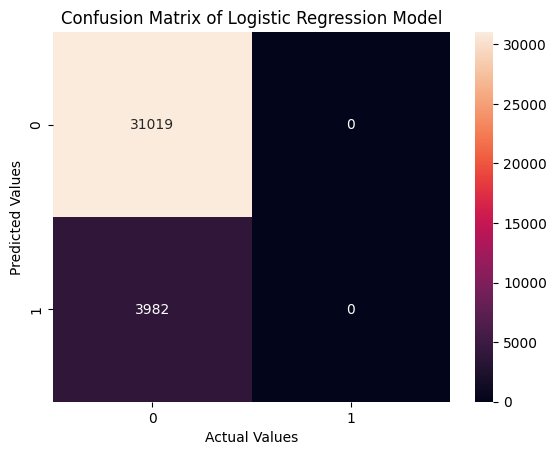

In [34]:
sn.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [35]:
print("Test Accuracy: {}".format(lr.score(x_test, y_test)))

Test Accuracy: 0.8908739417372176


# K-Nearest neighbor (KNN)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler_x = MinMaxScaler((-1,1))
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(x_train,y_train)
y_predict_knn=knn.predict(x_test)
Accuracy_knn=knn.score(x_test,y_test)

In [51]:
print("Test Accuracy:", Accuracy_knn)

Test Accuracy: 0.896273581761216


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(x_train, y_train)
y_predict_rf = rf.predict(x_test)
Accuracy_rf=rf.score(x_test,y_test)


In [53]:
print("Test Accuracy:",Accuracy_rf)

Test Accuracy: 0.892940470635291


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_predict_nb=nb.predict(x_test)
Accuracy_nb=nb.score(x_test,y_test)

In [55]:
print("Test Accuracy:", Accuracy_nb)

Test Accuracy: 0.8908739417372176


As we see we used four different models above which are: **Logistic Regression**(Test Accuracy: 0.8908739417372176). **K-Nearest neighbor** (KNN)(Test Accuracy: 0.896273581761216). **Random Forest**(Test Accuracy: 0.892940470635291). **Naive Bayes**(Test Accuracy: 0.8908739417372176).

Clearly we can see the K-Nearest neighbor is the best performing model. The accuracy is around 0.8962



In [57]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(x_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.6029358041562439


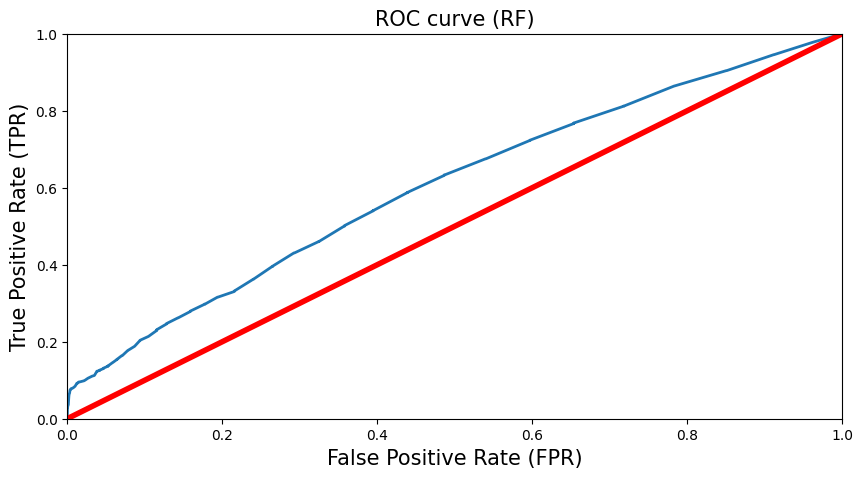

In [58]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

The above is the ROC-AUC Score and the ROC curve. But the code is from a student example. Since I don't understand ROC-AUC Score and ROC curve very well, I didn't have some deep understanding after outputting the image. However, it can be judged from the previous simple model accuracy that K-Nearest neighbor is the best performing model.